# Anova
## Analisis de varianza

El objetivo es conocer si es razonable pensar que un efecto puede deberse al azar. En el caso anova sera categorico -> numerico

Para nuestro ejemplo supongamos 4 estados, soltero, casado, separado o viudo vs presión en sangre :)

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
np.random.seed(42)
n_samples = 1000
categories = ['Soltero/a', 'Casado/a', 'Separado/a', 'Viudo/a']

# Asocia promedios de target con categorías
category_means = {'Soltero/a': 10, 'Casado/a': 30, 'Separado/a': 40, 'Viudo/a': 20}

# Genera datos
categorical_column = np.random.choice(categories, size=n_samples)
target = np.array([category_means[cat] + np.random.normal(0, 5) for cat in categorical_column])

# Crear un DataFrame
df = pd.DataFrame({'EstadoCivil': categorical_column, 'Target': target})

# Mezclar los datos para mayor aleatoriedad
df = shuffle(df).reset_index(drop=True)

df.head()


,EstadoCivil,Target
0,Viudo/a,18.591077
1,Casado/a,23.099493
2,Soltero/a,10.899471
3,Soltero/a,9.711906
4,Casado/a,32.109604


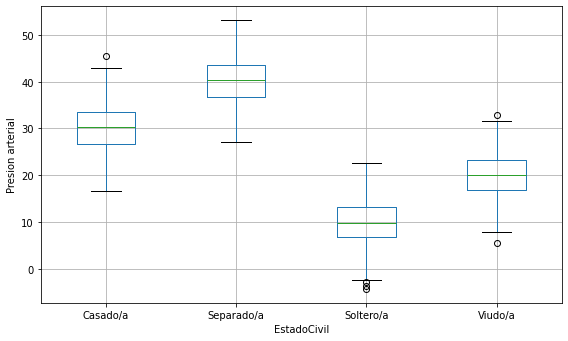

In [ ]:
ax = df.boxplot(by='EstadoCivil', column='Target', figsize=(8, 5))
ax.set_xlabel('EstadoCivil')
ax.set_ylabel('Presion arterial')
plt.suptitle('')
plt.title('')

plt.tight_layout()
plt.show()

Parece si hay una relacion entre el estado civil y la presión...¿pero es real o se debe al azar? Por supuesto, asumo H0=ninguna diferencia

1.Agrupo todos los datos en una única caja</BR>
2.Mezclamos y extraemos 4 remuestreos con la cantidad original de elementos</BR>
3.Registramos la media de cada uno de los 4 grupos</BR>
4.Registramos la varianza entre las medias de los 4 grupos</BR>
5.Repetimos pasos 2 a 4 muchas, digamos 1000 veces</BR>
¿En que proporción de tiempo la varianza muestreada de forma repetida excedio al varianza observada? Ese es el valor de p.
(Bruce, Bruce y Gedeck)


In [258]:
prob_A = 0.55
prob_B = 0.6
samples = 10000
# 1000 visitas a la página A y 1000 visitas a la página B
exitos_A = np.random.binomial(1, prob_A, samples)
exitos_B = np.random.binomial(1, prob_B, samples)

Hipotesis nula = "El sitio A y B son iguales"</BR>
Hipotesis alternativa = "El sitio B es mejor"</BR>
(Se aplica bidireccional solo por ser mas conservador)

In [259]:
diff = np.sum(exitos_B) - np.sum(exitos_A)
print("A: {} -> B: {} -> diff: {}".format(np.sum(exitos_A), np.sum(exitos_B), diff))

A: 5588 -> B: 5988 -> diff: 400


Metemos todos los datos en una única bolsa.

In [260]:
pagina = ['A'] * len(exitos_A) + ['B'] * len(exitos_B)
grupo = np.concatenate((exitos_A, exitos_B))  
df = pd.DataFrame({
    'Pagina': pagina,
    'exito': grupo,
    
})


Obtengo dos muestras sin reposicion...calculo la tasa de exitos y las diferencias. La media de las diferencias tendra distribución normal por el teorema del límite central. Almaceno las medias.

In [261]:
vals = []

for i in range(1000): 
    df_sample_1 = df.sample(n=samples, replace=False)
    df_sample_2 = df.drop(df_sample_1.index)
    vals.append(np.sum(df_sample_2["exito"])-np.sum(df_sample_1["exito"]))


Grafico para visualizar los resultados. Tambien obtengo el valor de p para tener una referencia numérica

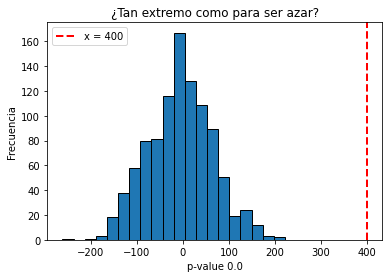

In [262]:
p_value = np.mean(vals >= diff)
plt.hist(vals, bins=20, edgecolor='black')
plt.axvline(x=diff, color='red', linestyle='--', linewidth=2, label=f'x = {diff}')
# Añadir etiquetas y leyenda
plt.xlabel('p-value {:.2}'.format(p_value)) 
plt.ylabel('Frecuencia')
plt.title('¿Tan extremo como para ser azar?')
plt.legend()

plt.show()

In [256]:
diff 

18